In [1]:
import pandas as pd
from E_Salary_Cities import *
from I_CompanySize_Technology import *
from E_Age_CompanyType import *
from D_Age_Technologies import *
from E_Position_YearsOfExperience import *
from P_Salary import *

DATA_PATH_2020 = '../Dataset/2020.csv'
DATA_PATH_2019 = '../Dataset/2019.csv'
DATA_PATH_2018 = '../Dataset/2018.csv'

df_2018 = pd.read_csv(DATA_PATH_2018)
df_2019 = pd.read_csv(DATA_PATH_2019)
df_2020 = pd.read_csv(DATA_PATH_2020)

SALARY='Salary'
COMPANY_SIZE='Company size'
AGE='Age'
GENDER='Gender'
CITY='City'
POSITION='Position'
YEARS_OF_EXPERIENCE='Years of experience'
SENIORITY_LEVEL='Seniority level'
AGE_SEGMENT = 'age_segment'

df_2020,df_2019,df_2018=read()

rename_columns(df_2020,df_2019,df_2018)
df_merged=merge([df_2020,df_2019,df_2018],common_columns=[SALARY,COMPANY_SIZE,AGE,GENDER,CITY,POSITION,YEARS_OF_EXPERIENCE,SENIORITY_LEVEL])

df = df_merged.copy()

assert df_merged.shape[0] == df_2018.shape[0] + df_2019.shape[0] + df_2020.shape[0]

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Observe Missing Values

In [2]:
display(compute_missing_vals(df_merged))

,Salary,Company size,Age,Gender,City,Position,Years of experience,Seniority level
Missing Values,16,47,229,24,29,35,49,49


## Removing Outliers

In [3]:
print('# of Rows Before Removing Salary Outliers', df_merged.shape[0])
df_merged = remove_outliers(df_merged,SALARY)
print('# of Rows After Removing Salary Outliers', df_merged.shape[0])

# of Rows Before Removing Salary Outliers 3009
# of Rows After Removing Salary Outliers 2803


## Bivariate Analysis

### Gender distribution before Cleaning

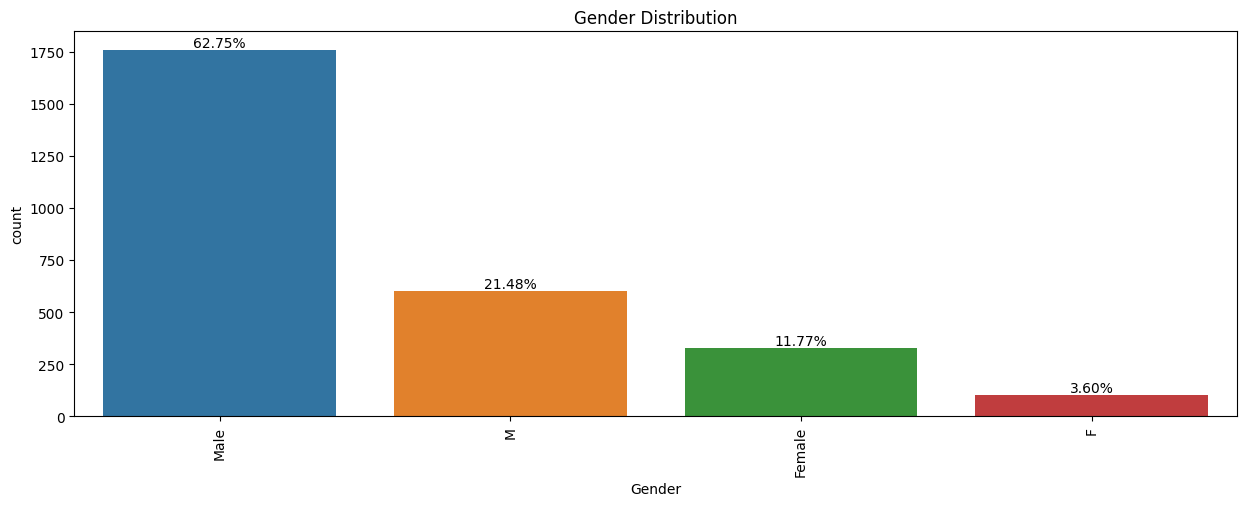

In [4]:
plt.figure(figsize=(15, 5))
plt_univariate_histogram(df_merged, GENDER, show_percentage=True)

### Gender distribution after Cleaning

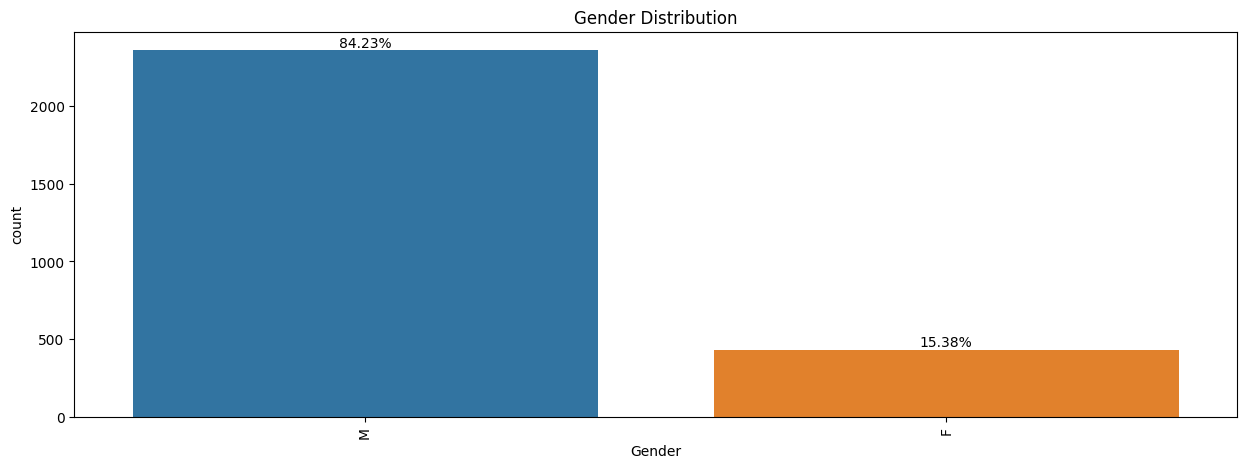

In [5]:
plt.figure(figsize=(15, 5))
df_plot = clean_gender(df_merged, GENDER)
plt_univariate_histogram(df_plot, GENDER, show_percentage=True)

### Distribution of Salary for each gender

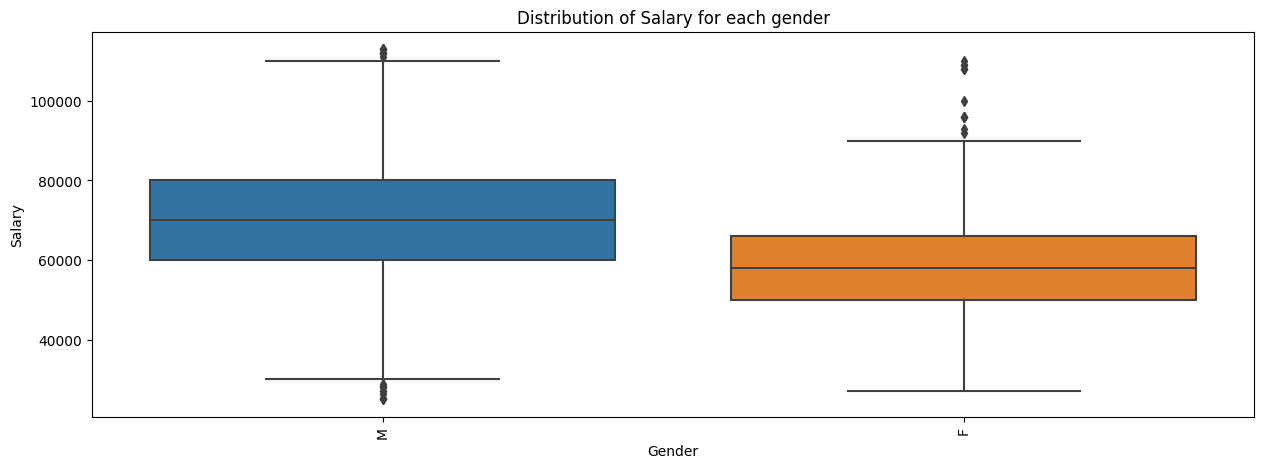

In [6]:
plt.figure(figsize=(15,5))
sns.boxplot(x=GENDER, y=SALARY, data=df_merged)
plt.xticks(rotation=90)
plt.title('Distribution of Salary for each gender')
plt.show()

### Distribution of Salary with Age (Numerical)

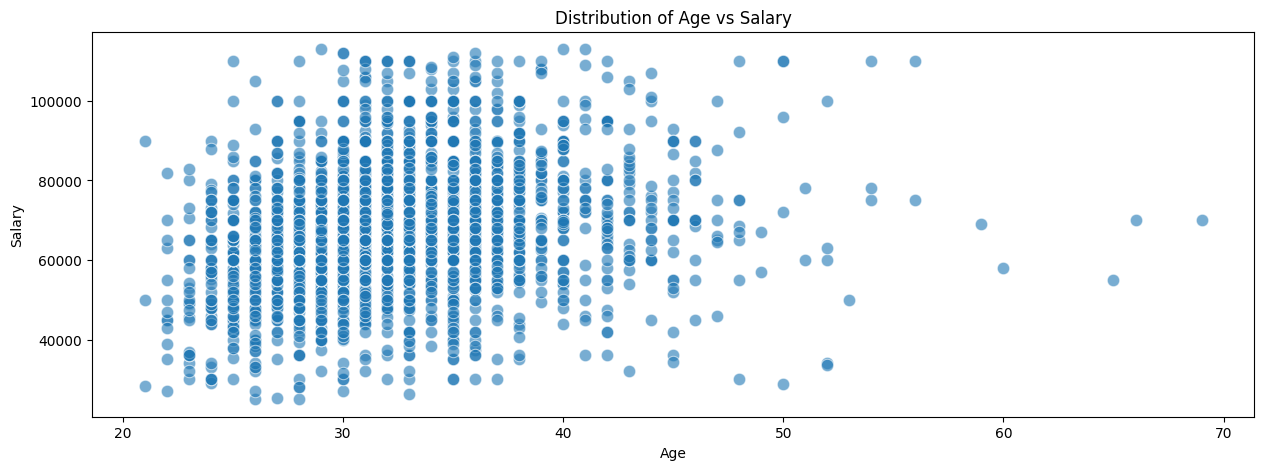

In [7]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=AGE, y=SALARY, data=df_merged, alpha=0.6, s=80)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Distribution of Age vs Salary')
plt.show()

### Distribution of Salary with Age Segments

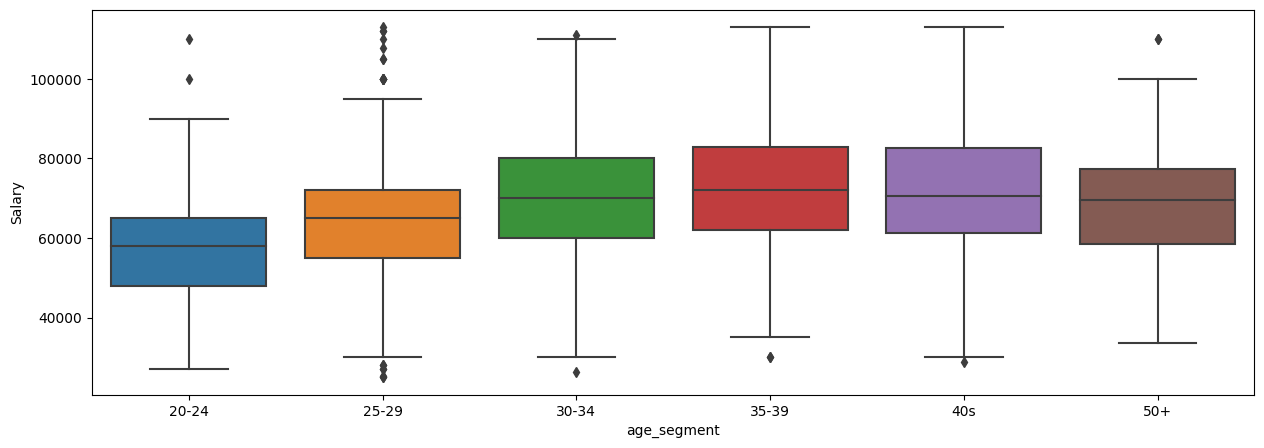

In [8]:
# Categorize age into age bins
df_plot = segment_age(df_merged)
plt.figure(figsize=(15,5))
sns.boxplot(x=AGE_SEGMENT, y=SALARY, data=df_plot)
plt.show()

### Company Size distribution after Cleaning

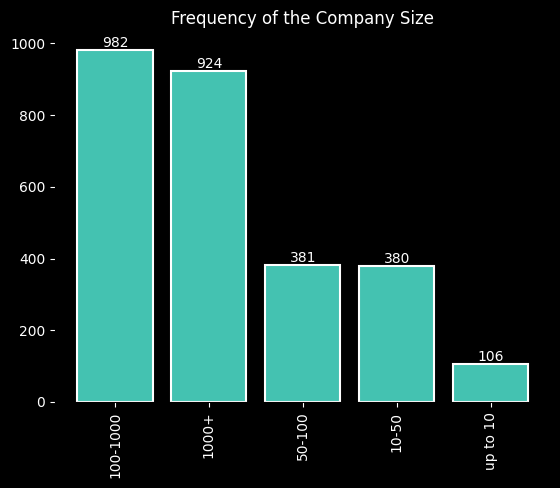

In [9]:
df_plot=clean_company_size(df_merged,COMPANY_SIZE,filter=False)
plot_single_histogram(df=df_plot,column=COMPANY_SIZE,title='Frequency of the Company Size')

### Distribution of Salary for each Company Size

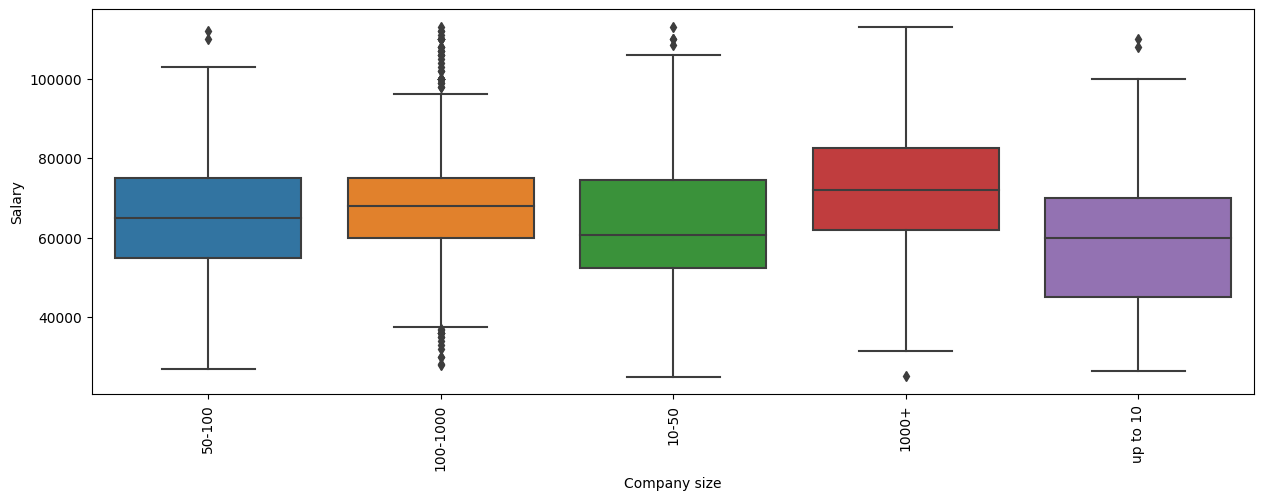

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(x=COMPANY_SIZE, y=SALARY, data=df_plot)
plt.xticks(rotation=90)
plt.show()

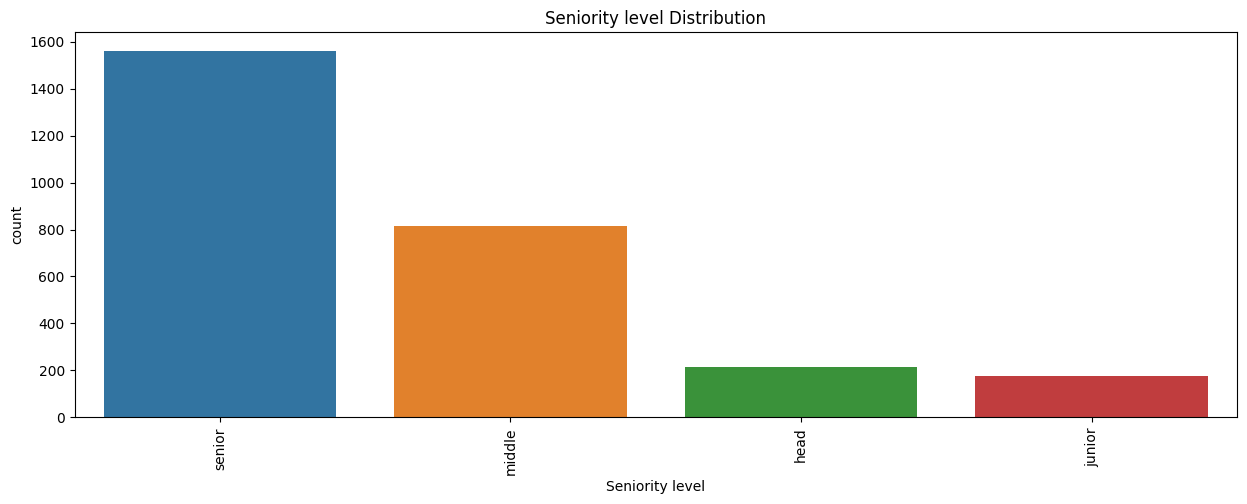

In [11]:
df_plot = clean_senior_col(df_merged)
plt.figure(figsize=(15,5))
plt_univariate_histogram(df=df_plot, cat_colname=SENIORITY_LEVEL)

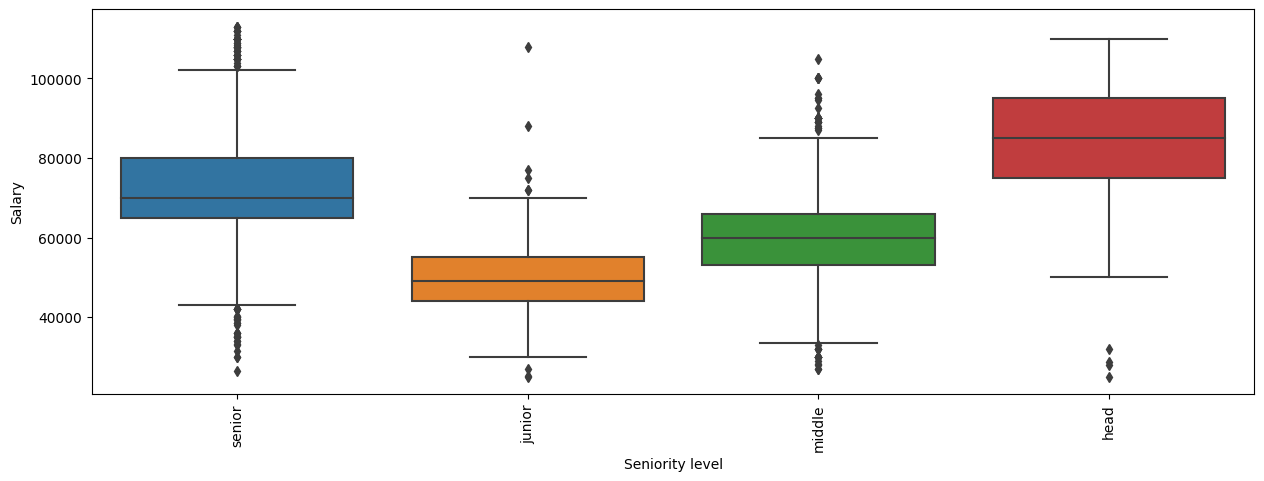

In [12]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=SENIORITY_LEVEL, y=SALARY, data=df_plot)
plt.xticks(rotation=90)
plt.show()

## Handling Missing Values

In [13]:
print('# of Rows Before Removing Missing Values', df.shape[0])
df_cleaned = df.dropna(how='any')
print('# of Rows After Removing Missing Values', df_cleaned.shape[0])

assert df_cleaned.isna().sum().sum() == 0

# of Rows Before Removing Missing Values 3009
# of Rows After Removing Missing Values 2679


## Cleaning

In [14]:
# Clean years of expirience
print("Missing Years of experience = ",df_cleaned[YEARS_OF_EXPERIENCE].isna().sum())
print("The available unique values are :",df_cleaned[YEARS_OF_EXPERIENCE].unique())
df_cleaned = clean_years(df_cleaned)
print("# of  unique values after cleaning is :",df_cleaned[YEARS_OF_EXPERIENCE].nunique())
print("unique values after cleaning are  :",df_cleaned[YEARS_OF_EXPERIENCE].unique())

Missing Years of experience =  0
The available unique values are : ['5' '7' '12' '4' '17' '6' '8' '15' '2' '14' '11' '18' '13' '30' '10' '25'
 '3' '40' '26' '9' '19' '20' '5.5' '22' '16' '0.8' '1' '1.5' '6.5' '21'
 '2.5' '28' '29' '23' '1,5' '24' '0' '4.5' '27'
 '1 (as QA Engineer) / 11 in total' '2,5' '15, thereof 8 as CTO' '31'
 '6 (not as a data scientist, but as a lab scientist)' '383' '3.5'
 'less than year' 13 3 6 10 11 12 15 7 8 9 2 5 16 20 4 14 18 19 0 25 1 17
 22 24 30 28 7.5 0.5 2.5 1.5 21.0 4.5]
# of  unique values after cleaning is : 42
unique values after cleaning are  : [ 5.   7.  12.   4.  17.   6.   8.  15.   2.  14.  11.  18.  13.  30.
 10.  25.   3.  40.  26.   9.  19.  20.   5.5 22.  16.   0.8  1.   1.5
  6.5 21.   2.5 28.  29.  23.  24.   0.   4.5 27.  31.   3.5  0.5  7.5]


In [15]:
df_cleaned = clean_positions(df_cleaned)
print("# of  unique values after cleaning is :",df_cleaned[POSITION].nunique())
print("unique values after cleaning are :",df_cleaned[POSITION].unique())

display(compute_missing_vals(df_cleaned))
print('# of Rows: ', df_cleaned.shape[0])

# of  unique values after cleaning is : 15
unique values after cleaning are : ['Software Engineer' 'Backend Developer' 'Frontend Developer' 'DevOps'
 'Data Engineer' 'Designer (UI/UX)' 'Product Manager' 'Mobile Developer'
 'Researcher' 'QA Engineer' 'Data Scientist' 'ML Engineer' 'Other'
 'Fullstack Developer' 'Security Engineer']


,Salary,Company size,Age,Gender,City,Position,Years of experience,Seniority level
Missing Values,0,0,0,0,0,0,0,0


# of Rows:  2679


In [16]:
print("unique values before cleaning are :",df_cleaned[CITY].nunique())
df_cleaned = clean_cities(df_cleaned)
print("# of  unique values after cleaning is :",df_cleaned[CITY].nunique())
print("unique values after cleaning are :",df_cleaned[CITY].unique())

display(compute_missing_vals(df_cleaned))
print('# of Rows: ', df_cleaned.shape[0])

unique values before cleaning are : 172
# of  unique values after cleaning is : 144
unique values after cleaning are : ['Munich' 'Berlin' 'Hamburg' 'Wolfsburg' 'Stuttgart' 'Schleswig-holstein'
 'Konstanz' 'Frankfurt' 'Cologne' 'Kempten' 'Munster' 'Erlangen' 'Vienna'
 'Moldova' 'Rosenheim' 'Mannheim' 'Boeblingen' 'Dusseldorf' 'Ingolstadt'
 'Nuremberg' 'Ansbach' 'Leipzig' 'Tuttlingen' 'Bonn' 'Moscow' 'Koblenz'
 'Warsaw' 'Heidelberg' 'Aachen' 'Riga' 'Latvia' 'Zurich' 'Helsinki'
 'Wurzburg' 'Kyiv' 'Den haag' 'London' 'Amsterdam' 'Cracovia' 'Tallinn'
 'Prague' 'Utrecht' 'Stockholm' 'Braunschweig' 'Dresden' 'Malta' 'Lubeck'
 'Bodensee' 'Milan' 'Salzburg' 'Rome' 'Wroclaw' 'Karlsruhe' 'Cupertino'
 'Paris' 'Dublin' 'Paderborn' 'Ulm' 'Barcelona' 'Bolingen' 'Tampere'
 'Hannover' 'Siegen' 'Minsk' 'Marseille' 'Friedrichshafen' 'Walldorf'
 'Eindhoven' 'France' 'Regensburg' 'Poland' 'Heilbronn' 'Dortmund' 'Jena'
 'City in russia' 'Cracow' 'Brunswick' 'Madrid' 'Lisbon' 'Sofia' 'Luttich'
 'Milano' 'Bie

,Salary,Company size,Age,Gender,City,Position,Years of experience,Seniority level
Missing Values,0,0,0,0,0,0,0,0


# of Rows:  2685


In [17]:
print('Before cleanning, Company size unique values are',df_cleaned[COMPANY_SIZE].unique())
df_cleaned = clean_company_size(df_cleaned,COMPANY_SIZE,filter=False)
print('After cleanning, Company size unique values are',df_cleaned[COMPANY_SIZE].unique())

display(compute_missing_vals(df_cleaned))
print('# of Rows: ', df_cleaned.shape[0])

Before cleanning, Company size unique values are ['51-100' '101-1000' '11-50' '1000+' 'up to 10' '50-100' '10-50'
 '100-1000']
After cleanning, Company size unique values are ['50-100' '100-1000' '10-50' '1000+' 'up to 10']


,Salary,Company size,Age,Gender,City,Position,Years of experience,Seniority level
Missing Values,0,0,0,0,0,0,0,0


# of Rows:  2685


In [18]:
print('Before cleanning, gender unique values are',df_cleaned[GENDER].unique())
df_cleaned = clean_gender(df_cleaned,GENDER)
print('After cleanning, gender unique values are',df_cleaned[GENDER].unique())

display(compute_missing_vals(df_cleaned))
print('# of Rows: ', df_cleaned.shape[0])

Before cleanning, gender unique values are ['Male' 'Female' 'Diverse' 'M' 'F']
After cleanning, gender unique values are ['M' 'F']


,Salary,Company size,Age,Gender,City,Position,Years of experience,Seniority level
Missing Values,0,0,0,0,0,0,0,0


# of Rows:  2685


In [19]:
print('Before cleanning, seniority level unique values are',df_cleaned[SENIORITY_LEVEL].unique())
df_cleaned = clean_senior_col(df_cleaned, filter=0)
print('After cleanning, seniority level unique values are',df_cleaned[SENIORITY_LEVEL].unique())

display(compute_missing_vals(df_cleaned))
print('# of Rows: ', df_cleaned.shape[0])


Before cleanning, seniority level unique values are ['Senior' 'Lead' 'Junior' 'Middle' 'Head' 'No level' 'VP' 'Manager'
 'Work Center Manager' 'CTO' 'No level ' 'Director' 'Key'
 'C-level executive manager' 'Principal' 'intern' 'Student'
 'no idea, there are no ranges in the firm ' 'C-Level' 'Working Student'
 'Entry level' 'Intern' 'student' 'Self employed']
After cleanning, seniority level unique values are ['senior' 'head' 'junior' 'middle']


,Salary,Company size,Age,Gender,City,Position,Years of experience,Seniority level
Missing Values,0,0,0,0,0,0,0,0


# of Rows:  2681


In [20]:
df_cleaned = create_category_other(df_cleaned)

### Remove outlier salaries

In [21]:
print('# of rows with outliers:', df_cleaned.shape[0])
df_cleaned = remove_outliers(df=df_cleaned, column=SALARY)
print('# of rows without outliers:', df_cleaned.shape[0])

# of rows with outliers: 2681
# of rows without outliers: 2527


In [22]:
# encoding categorical variables
df_cleaned = encode_categorical(df_cleaned)
# Split the data into train and test
train, test = data_split(df_cleaned, validation=False)
X_train, y_train = get_X_y(train)
X_test, y_test = get_X_y(test)

### Train and Predict

In [48]:
from sklearn.linear_model import LinearRegression, Lasso
import xgboost as xgb
from sklearn.svm import SVR

print('Building XGBoost regression model')
xg = xgb.XGBRegressor(learning_rate=0.1, n_estimators=500)
xg = train_model(xg, X_train, y_train, X_test, y_test)

print('Building Linear regression model')
lr = LinearRegression()
lr = train_model(lr, X_train, y_train, X_test, y_test)

print('Building SVR model')
svr = SVR(kernel='poly', degree=3, C=1000.0, gamma='scale')
svr = train_model(svr, X_train, y_train, X_test, y_test)

Building XGBoost regression model
Training MAE: 2898.0849750664893
Testing MAE: 9688.511969645504
Training MSE: 18568894.589697346
Testing MSE: 166462771.78460106

Building Linear regression model
Training MAE: 10487.26786951852
Testing MAE: 11223.064640103275
Training MSE: 189244729.23112118
Testing MSE: 213410774.9649197

Building Lasso regression model
Training MAE: 10487.262987183905
Testing MAE: 11223.02993999775
Training MSE: 189244729.39894134
Testing MSE: 213409789.9772255

Building SVR model
Training MAE: 10933.87878621391
Testing MAE: 11330.267470024228
Training MSE: 208463912.70008367
Testing MSE: 220941961.71320653



### Grid Search and Hyper Parameters Tuning

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,10), 'criterion':('poisson', 'absolute_error', 'squared_error', 'friedman_mse'), 'max_features':('auto','sqrt','log2')}

rf = RandomForestRegressor()

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

In [ ]:
y_test_pred = gs.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)

### Feature Selection

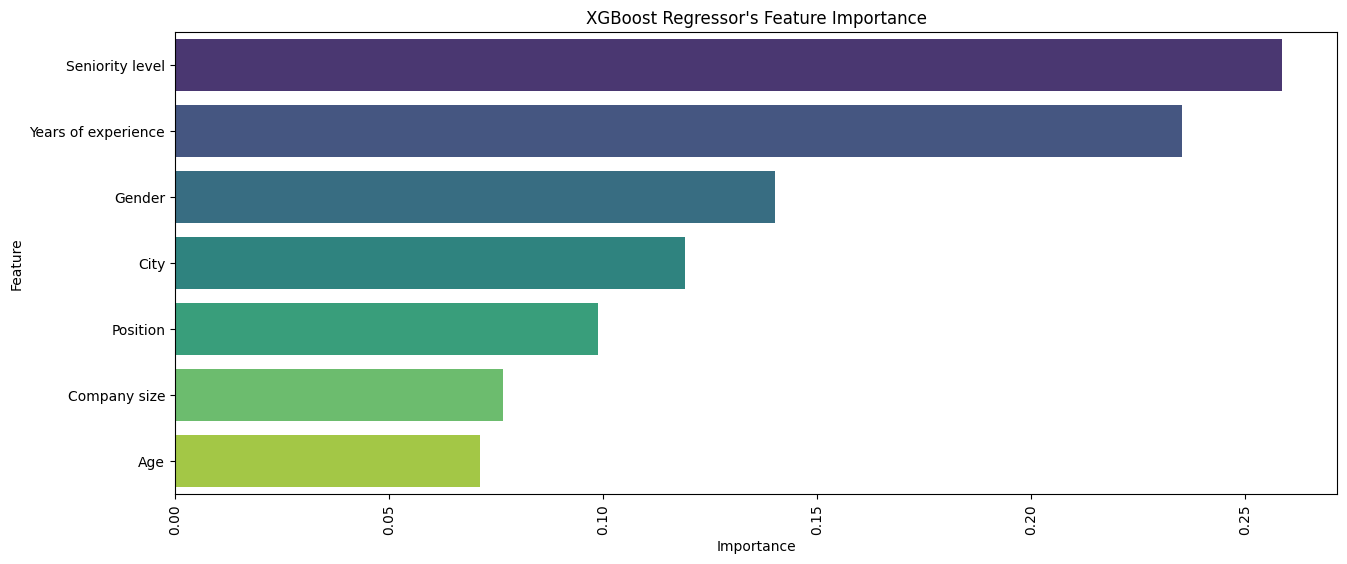

In [33]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': xg.feature_importances_})
# Sort the DataFrame by importance scores in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)
# Plot the features' importance
plt.figure(figsize=(15, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, orient='h', palette='viridis')
plt.xticks(rotation=90)
plt.title('XGBoost Regressor\'s Feature Importance')
plt.show()